# LGMVIP - Data Science June 2023
Author : Nanthitha B

Task 2: Prediction using Decision Tree Algorithm


Level: Intermediate

Intermediate Task-2

# Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv("C:\\Users\\nanth\\OneDrive\\Desktop\\IRIS.csv")
data

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.tail()

,id,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.shape

(150, 6)

In [9]:
s=data.drop('id', axis=1)
s

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
data.isnull().sum()

id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.nunique()

id              150
sepal_length     35
sepal_width      23
petal_length     43
petal_width      22
species           3
dtype: int64

In [13]:
data.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [14]:
data.max()

id                         150
sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [15]:
data.min()

id                        1
sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object

# Visualization 

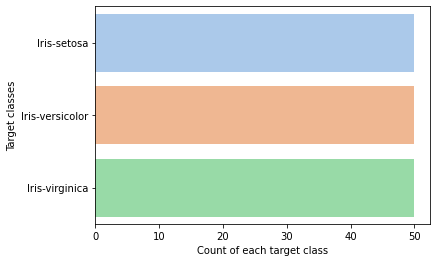

In [16]:
#target class count
sns.countplot(y=data.species, data=data, palette="pastel")
plt.xlabel("Count of each target class")
plt.ylabel("Target classes")
plt.show()

id                 AxesSubplot(0.125,0.657941;0.352273x0.222059)
sepal_length    AxesSubplot(0.547727,0.657941;0.352273x0.222059)
sepal_width        AxesSubplot(0.125,0.391471;0.352273x0.222059)
petal_length    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
petal_width           AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

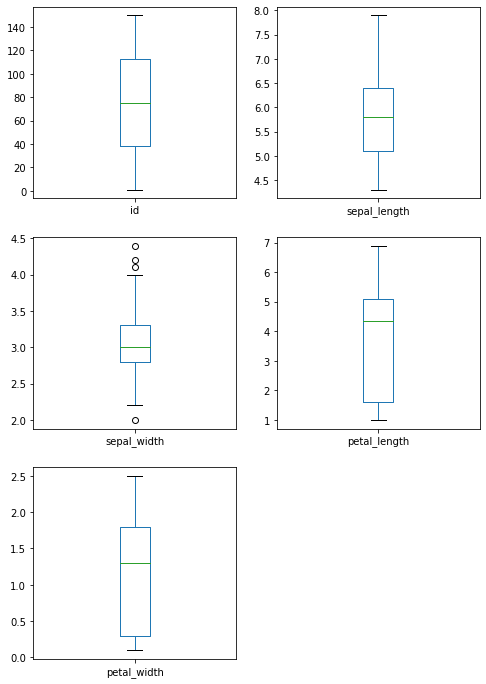

In [17]:
data.plot(kind='box', subplots=True, layout=(3,2), figsize=(8,12))

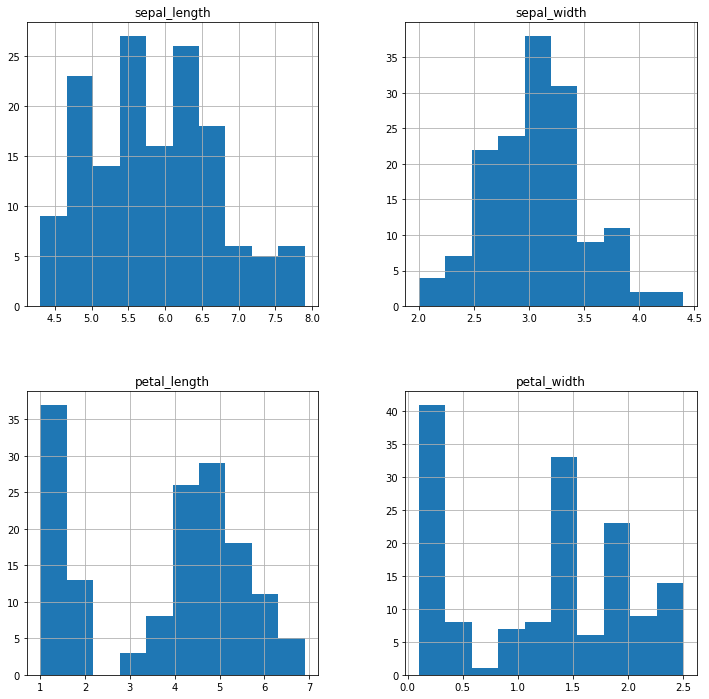

In [18]:
s.hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

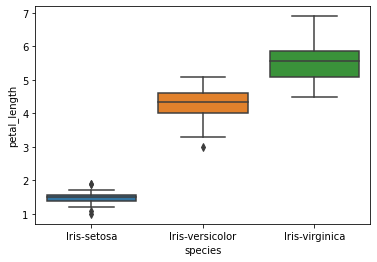

In [19]:
sns.boxplot(x='species', y='petal_length', data=data)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

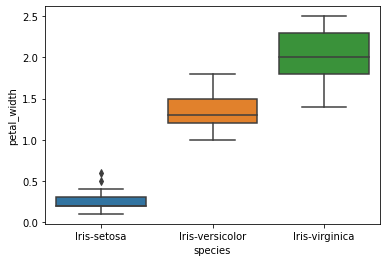

In [20]:
sns.boxplot(x='species', y='petal_width', data=data)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

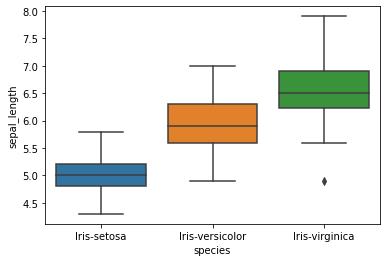

In [21]:
sns.boxplot(x='species', y='sepal_length', data=data)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

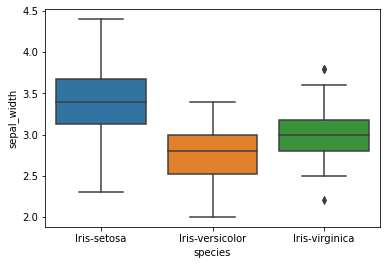

In [22]:
sns.boxplot(x='species', y='sepal_width', data=data)

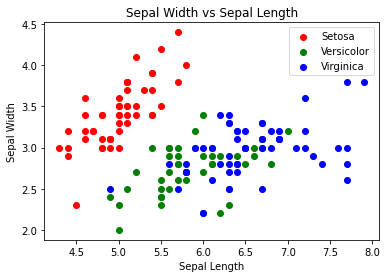

In [23]:
#Sepal Length vs Sepal Width
setosa_data = data[data.species == 'Iris-setosa']
versicolor_data = data[data.species == 'Iris-versicolor']
virginica_data = data[data.species == 'Iris-virginica']

plt.scatter(setosa_data.sepal_length, setosa_data.sepal_width, color='red', label='Setosa')
plt.scatter(versicolor_data.sepal_length, versicolor_data.sepal_width, color='green', label='Versicolor')
plt.scatter(virginica_data.sepal_length, virginica_data.sepal_width, color='blue', label='Virginica')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs Sepal Length')
plt.legend()

plt.show()


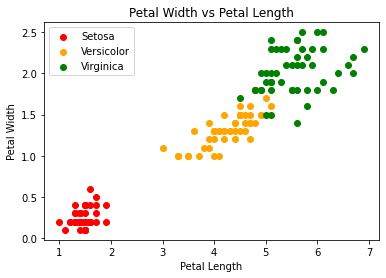

In [24]:
#Petal Length vs Petal Width

setosa_data = data[data.species == 'Iris-setosa']
versicolor_data = data[data.species == 'Iris-versicolor']
virginica_data = data[data.species == 'Iris-virginica']

plt.scatter(setosa_data.petal_length, setosa_data.petal_width, color='red', label='Setosa')
plt.scatter(versicolor_data.petal_length, versicolor_data.petal_width, color='orange', label='Versicolor')
plt.scatter(virginica_data.petal_length, virginica_data.petal_width, color='green', label='Virginica')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width vs Petal Length')
plt.legend()

plt.show()


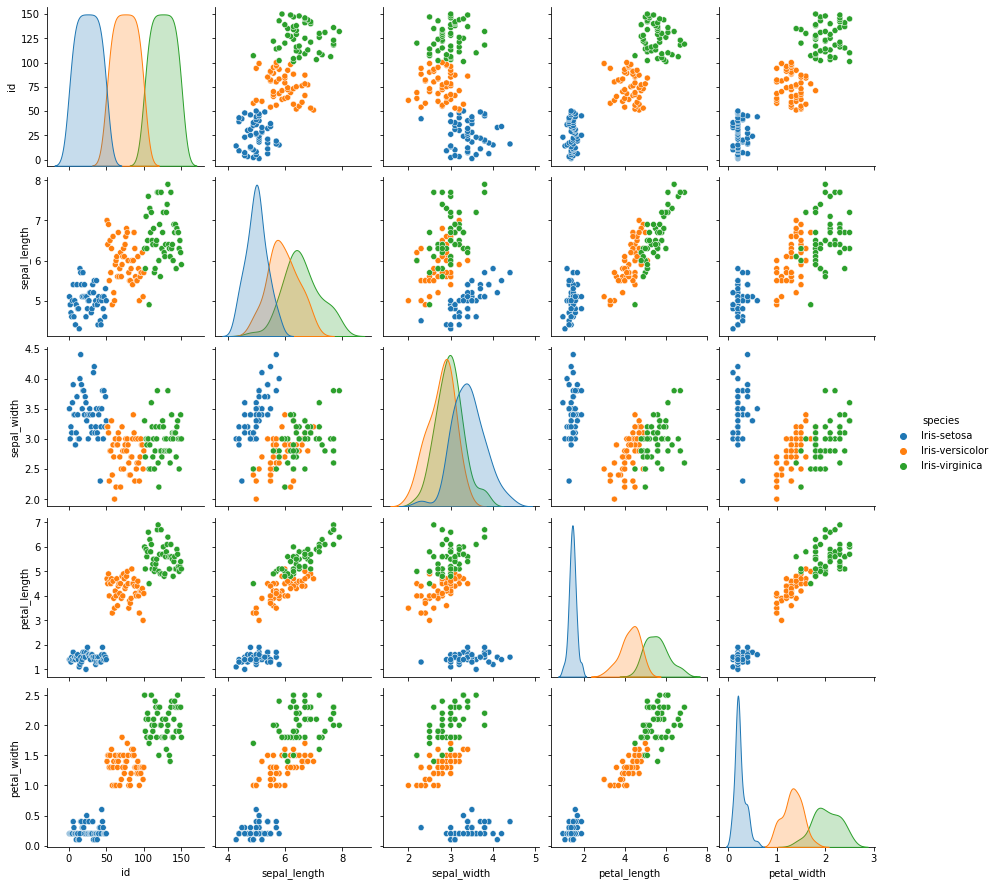

In [25]:
sns.pairplot(data, hue='species')

# Data Preprocessing or Correlation matrix

In [26]:
data.corr()

,id,sepal_length,sepal_width,petal_length,petal_width
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


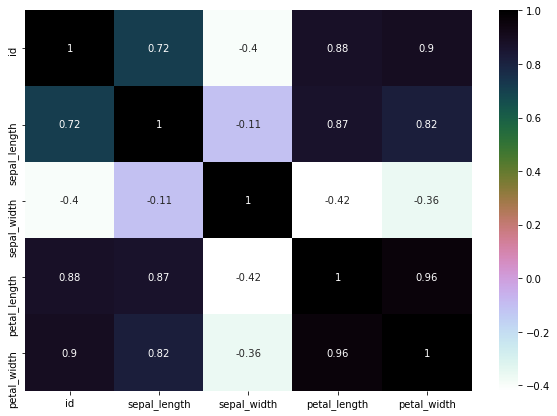

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r')
plt.show()

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
s['species']=le.fit_transform(s['species'])
s

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
x=s.drop(columns=['species'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y=s['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

# Splitting data into train and test

In [32]:
from sklearn.model_selection import train_test_split
tt=train_test_split
xtrain, xtest, ytrain, ytest=tt(x,y,test_size=0.3,random_state=0)

# Selecting Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

# Traning and Evaluating Model

In [34]:
models=[lr,knn,svc,gnb,dtc,rfc]
scores=[]

for model in models:
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))
    print("Accuracy of" + type(model).__name__+  ' is', accuracy_score(ytest,ypred))

Accuracy ofLogisticRegression is 0.9777777777777777
Accuracy ofKNeighborsClassifier is 0.9777777777777777
Accuracy ofSVC is 0.9777777777777777
Accuracy ofGaussianNB is 1.0
Accuracy ofDecisionTreeClassifier is 0.9777777777777777
Accuracy ofRandomForestClassifier is 0.9777777777777777


# Accuracy by Confusion Matrix 

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm=confusion_matrix(ytest,ypred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

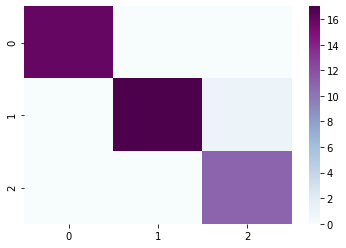

In [37]:
sns.heatmap(cm, cmap='BuPu')

# Plot Decision Tree

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

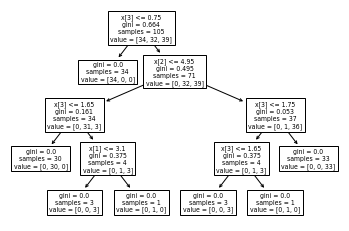

In [38]:
from sklearn import tree
tree.plot_tree(dtc)

In [39]:
!pip install pydotplus

In [40]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [3]:
species_tree=DecisionTreeClassifier(criterion="entropy", max_depth=5)

NameError: name 'DecisionTreeClassifier' is not defined

In [88]:
species_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [89]:
prediction=species_tree.predict(xtest)

In [90]:
print(prediction[0:5])
print(ytest[0:5])

[2 1 0 2 0]
114    2
62     1
33     0
107    2
7      0
Name: species, dtype: int32


In [104]:
!pip install graphviz


In [105]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [1]:
#Printing decision tree
dot_data = StringIO()
filename = "Speciestree.png"
featureNames = data.columns[0:4]
targetNames = data["species"].unique().tolist()

out = tree.export_graphviz(species_tree, feature_names=featureNames, out_file=dot_data, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

NameError: name 'StringIO' is not defined